In [43]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [44]:
#Connect to the Score Database

sql_connect = sqlite3.connect('..\data\survive.db')

# Save the SQL query string

query = "SELECT * FROM survive"

#Create a dataframe 
df = pd.read_sql_query(query,sql_connect)
df

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,Creatinine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,2261,136,15.3,130,48,yellow
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,91MBFV,0,Male,Yes,Normal,50,Low,140,0.9,362000.0,298,109,11.8,178,51,blue
14996,3BK9WM,1,Male,Yes,Normal,62,Low,140,0.9,253000.0,231,141,14.6,171,114,green
14997,01ZP6F,0,Female,No,Normal,61,Low,141,0.9,229000.0,84,173,9.2,156,71,blue
14998,JMSGEG,0,Male,No,Normal,77,Low,137,1.1,406000.0,109,154,11.3,130,32,red


_____________________________
# Preliminary Data Investigation

In [45]:
#Check the Number of total number of data in each featues
print('\n Total number of data in each features \n')
print(df.info())


 Total number of data in each features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        15000 non-null  object 
 1   Survive                   15000 non-null  object 
 2   Gender                    15000 non-null  object 
 3   Smoke                     15000 non-null  object 
 4   Diabetes                  15000 non-null  object 
 5   Age                       15000 non-null  int64  
 6   Ejection Fraction         15000 non-null  object 
 7   Sodium                    15000 non-null  int64  
 8   Creatinine                14501 non-null  float64
 9   Pletelets                 15000 non-null  float64
 10  Creatinine phosphokinase  15000 non-null  int64  
 11  Blood Pressure            15000 non-null  int64  
 12  Hemoglobin                15000 non-null  float64
 13  Height             

In [46]:
#Check if there is any Null values within each features
print('\n Any Null Values in each features \n')
df.isnull().sum()


 Any Null Values in each features 



ID                            0
Survive                       0
Gender                        0
Smoke                         0
Diabetes                      0
Age                           0
Ejection Fraction             0
Sodium                        0
Creatinine                  499
Pletelets                     0
Creatinine phosphokinase      0
Blood Pressure                0
Hemoglobin                    0
Height                        0
Weight                        0
Favorite color                0
dtype: int64

In [47]:
#Check the Number of unique values within each features
print('\n Unique Values in each features \n')
df.nunique()


 Unique Values in each features 



ID                          14042
Survive                         4
Gender                          2
Smoke                           4
Diabetes                        3
Age                            87
Ejection Fraction               5
Sodium                         27
Creatinine                     40
Pletelets                     176
Creatinine phosphokinase      208
Blood Pressure                139
Hemoglobin                     86
Height                         60
Weight                        123
Favorite color                  6
dtype: int64


###### Further investigate is required possibility of duplicate ID as the unique value in it are 958 lesser than the total count in the dataset.

###### 499 data points are missing from Creatinine attributes.

###### There is also a need to ascertain are the logic in values of object types is unique by its class and standardise to facilitate the machine learning process later.

________________________________
# Data Standardization & Feature Engineering

### Check and Standardise Unique values in Features

In [48]:
#Check the unique value in each object items

print(df['Survive'].unique())
print(df['Gender'].unique())
print(df['Smoke'].unique())
print(df['Diabetes'].unique())
print(df['Ejection Fraction'].unique())
print(df['Favorite color'].unique())

['0' '1' 'No' 'Yes']
['Male' 'Female']
['Yes' 'No' 'NO' 'YES']
['Normal' 'Pre-diabetes' 'Diabetes']
['Low' 'Normal' 'High' 'L' 'N']
['green' 'black' 'white' 'yellow' 'blue' 'red']


In [49]:
#Standardise the value

# - Check the common entry pattern
print(df['Survive'].value_counts())
print('\n')
print(df['Smoke'].value_counts())
print('\n')
print(df['Ejection Fraction'].value_counts())


# - Map to standardise the values in the identified features

df['Survive'].replace(['No','Yes'],['0','1'],inplace=True)
df['Smoke'].replace(['NO','YES'],['No','Yes'],inplace=True)
df['Ejection Fraction'].replace(['L','N'],['Low','Normal'],inplace=True)

# - Change from string to numeric to facilitate the correlation measurement
df['Survive'].replace(['0','1'],[0,1],inplace=True) 




0      9581
1      4552
No      604
Yes     263
Name: Survive, dtype: int64


No     9710
Yes    4707
NO      399
YES     184
Name: Smoke, dtype: int64


Low       12734
Normal     1658
L           482
N            66
High         60
Name: Ejection Fraction, dtype: int64


In [50]:
# - Post Check
print("\nPost replacement Check")
print(df['Survive'].value_counts())
print('\n')
print(df['Smoke'].value_counts())
print('\n')
print(df['Ejection Fraction'].value_counts())


Post replacement Check
0    10185
1     4815
Name: Survive, dtype: int64


No     10109
Yes     4891
Name: Smoke, dtype: int64


Low       13216
Normal     1724
High         60
Name: Ejection Fraction, dtype: int64


### One hot encoding on the categorical attritutes

In [51]:
#One-hot encode

X = df[['Smoke','Gender','Diabetes','Ejection Fraction']]
X = pd.get_dummies(X)

#Join the One hot encode dataframe & Drop categorical row
df = df.join(X)
#df = df.drop(['Smoke','Gender','Diabetes','Ejection Fraction'],axis=1)

df

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,...,Smoke_No,Smoke_Yes,Gender_Female,Gender_Male,Diabetes_Diabetes,Diabetes_Normal,Diabetes_Pre-diabetes,Ejection Fraction_High,Ejection Fraction_Low,Ejection Fraction_Normal
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,...,0,1,0,1,0,1,0,0,1,0
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,...,1,0,0,1,0,1,0,0,1,0
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,...,1,0,1,0,0,0,1,0,1,0
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,...,1,0,0,1,0,1,0,0,1,0
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,91MBFV,0,Male,Yes,Normal,50,Low,140,0.9,362000.0,...,0,1,0,1,0,1,0,0,1,0
14996,3BK9WM,1,Male,Yes,Normal,62,Low,140,0.9,253000.0,...,0,1,0,1,0,1,0,0,1,0
14997,01ZP6F,0,Female,No,Normal,61,Low,141,0.9,229000.0,...,1,0,1,0,0,1,0,0,1,0
14998,JMSGEG,0,Male,No,Normal,77,Low,137,1.1,406000.0,...,1,0,0,1,0,1,0,0,1,0


________________________________
# Data Cleaning

### Investigate Missing Value

In [52]:
df.isnull().sum()

ID                            0
Survive                       0
Gender                        0
Smoke                         0
Diabetes                      0
Age                           0
Ejection Fraction             0
Sodium                        0
Creatinine                  499
Pletelets                     0
Creatinine phosphokinase      0
Blood Pressure                0
Hemoglobin                    0
Height                        0
Weight                        0
Favorite color                0
Smoke_No                      0
Smoke_Yes                     0
Gender_Female                 0
Gender_Male                   0
Diabetes_Diabetes             0
Diabetes_Normal               0
Diabetes_Pre-diabetes         0
Ejection Fraction_High        0
Ejection Fraction_Low         0
Ejection Fraction_Normal      0
dtype: int64

In [53]:
#Check the data of those rows with missing Creatinine Value

df[df['Creatinine'].isnull()]

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,...,Smoke_No,Smoke_Yes,Gender_Female,Gender_Male,Diabetes_Diabetes,Diabetes_Normal,Diabetes_Pre-diabetes,Ejection Fraction_High,Ejection Fraction_Low,Ejection Fraction_Normal
23,RXITR4,0,Male,No,Normal,85,Low,134,NaN,235000.0,...,1,0,0,1,0,1,0,0,1,0
42,5QQC5E,0,Male,No,Normal,70,Low,132,NaN,173000.0,...,1,0,0,1,0,1,0,0,1,0
66,L2OFHN,0,Male,No,Pre-diabetes,70,Low,137,NaN,241000.0,...,1,0,0,1,0,0,1,0,1,0
187,0Q3VC7,0,Female,No,Normal,65,Low,139,NaN,294000.0,...,1,0,1,0,0,1,0,0,1,0
220,83N43Z,0,Male,No,Diabetes,55,Low,135,NaN,336000.0,...,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14913,VVZ7NC,0,Male,Yes,Normal,69,Low,135,NaN,105000.0,...,0,1,0,1,0,1,0,0,1,0
14935,BKXIYC,0,Male,Yes,Normal,50,Low,136,NaN,395000.0,...,0,1,0,1,0,1,0,0,1,0
14959,QOYS4C,0,Male,Yes,Normal,-50,Normal,140,NaN,147000.0,...,0,1,0,1,0,1,0,0,0,1
14963,XFZHTJ,0,Male,Yes,Normal,53,Normal,133,NaN,220000.0,...,0,1,0,1,0,1,0,0,0,1


In [54]:
#Check the correlation of the label features on Creatinine attributes

df.corr()['Creatinine'].sort_values(ascending=False)

Creatinine                  1.000000
Survive                     0.304157
Weight                      0.137546
Age                         0.073372
Diabetes_Normal             0.049189
Smoke_No                    0.036030
Ejection Fraction_Normal    0.027738
Gender_Male                 0.008673
Height                      0.007766
Blood Pressure             -0.002577
Gender_Female              -0.008673
Ejection Fraction_High     -0.013966
Creatinine phosphokinase   -0.022988
Ejection Fraction_Low      -0.024602
Diabetes_Pre-diabetes      -0.029782
Diabetes_Diabetes          -0.030022
Smoke_Yes                  -0.036030
Pletelets                  -0.045403
Hemoglobin                 -0.057990
Sodium                     -0.187890
Name: Creatinine, dtype: float64

0    499
Name: Survive, dtype: int64


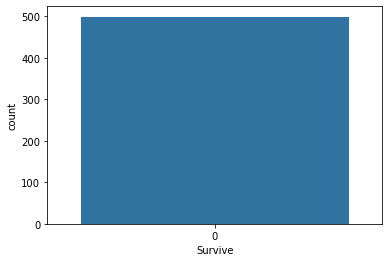

In [55]:
#Check the concerned label as Creatinine has positive correlation with the survivorship 
sns.countplot(df[df['Creatinine'].isnull()]['Survive'])

print(df[df['Creatinine'].isnull()]['Survive'].value_counts())

0    10185
1     4815
Name: Survive, dtype: int64


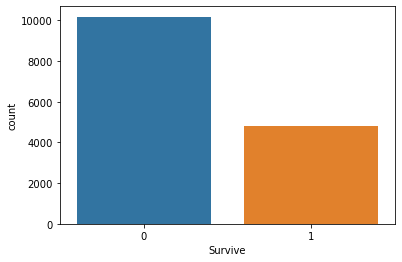

In [56]:
# Check categories count of the survivor label to access the impact of dropping it
sns.countplot(df['Survive'])
print(df['Survive'].value_counts()) 

In [57]:
# Drop the null value column
df = df.dropna()



###### As found ,there were no survivor in the rows where the Creatinine value were missing.

###### Hence, the decision to drop the affected rows has minimal impact on the dataset as it represent 3.3% of the total data and 4.8% of those who didnt survived.


### Investigate on Duplicate ID

In [58]:
#Investigate the details of those duplicate ID 

df[df['ID'].duplicated()].sort_values(by=['ID'])


,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,...,Smoke_No,Smoke_Yes,Gender_Female,Gender_Male,Diabetes_Diabetes,Diabetes_Normal,Diabetes_Pre-diabetes,Ejection Fraction_High,Ejection Fraction_Low,Ejection Fraction_Normal
11833,00G7VD,0,Female,No,Pre-diabetes,65,Low,136,1.0,257000.0,...,1,0,1,0,0,0,1,0,1,0
13763,00IUNH,0,Male,No,Pre-diabetes,50,Low,130,0.7,260000.0,...,1,0,0,1,0,0,1,0,1,0
13380,03HS9P,0,Male,Yes,Normal,61,Low,136,0.7,267000.0,...,0,1,0,1,0,1,0,0,1,0
7670,09XU1X,0,Male,No,Normal,77,Low,137,1.1,406000.0,...,1,0,0,1,0,1,0,0,1,0
8750,0A81TB,1,Male,No,Normal,50,Low,137,1.1,276000.0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,ZW2T4X,0,Male,Yes,Normal,50,Low,140,0.9,362000.0,...,0,1,0,1,0,1,0,0,1,0
10668,ZWS587,0,Female,No,Normal,70,Low,133,0.8,305000.0,...,1,0,1,0,0,1,0,0,1,0
13527,ZXGNKE,0,Female,No,Normal,64,Normal,135,1.5,309000.0,...,1,0,1,0,0,1,0,0,0,1
5647,ZY89HT,0,Male,Yes,Normal,70,Normal,145,1.1,176000.0,...,0,1,0,1,0,1,0,0,0,1


In [59]:
#Sample check on few of the duplicated ID to analysis the differences in the finding.

dupcheck = (df['ID'] == 'KKJW0H')
df_dupcheck = df.loc[dupcheck]
df_dupcheck

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,...,Smoke_No,Smoke_Yes,Gender_Female,Gender_Male,Diabetes_Diabetes,Diabetes_Normal,Diabetes_Pre-diabetes,Ejection Fraction_High,Ejection Fraction_Low,Ejection Fraction_Normal
3845,KKJW0H,0,Male,Yes,Diabetes,70,Low,136,0.8,249000.00,...,0,1,0,1,1,0,0,0,1,0
5551,KKJW0H,1,Male,No,Pre-diabetes,45,Low,139,1.0,390000.00,...,1,0,0,1,0,0,1,0,1,0
6462,KKJW0H,1,Male,No,Normal,80,Low,134,1.1,263358.03,...,1,0,0,1,0,1,0,0,1,0


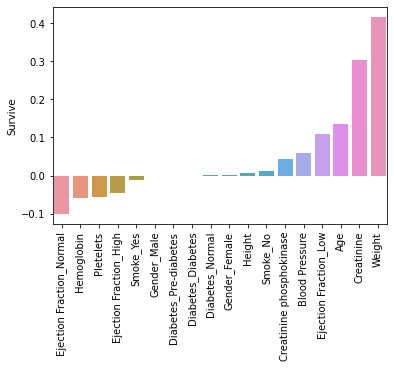

In [60]:
#Correlation Studies

x = df.corr()['Survive'].sort_values(ascending=True).index[1:-1]
y = df.corr()['Survive'].sort_values(ascending=True)[1:-1]
sns.barplot(x,y)
plt.xticks(rotation=90);

###### The heatmap illustrated that Weight,Creatinine and Age were the important determinants of the survivorship as they have a positive correlation to it.

In [61]:
# Look at positive correlated data points of all Duplicate IDs

A =df[df['ID'].duplicated(keep='last')].sort_values(by=['ID'])[['ID','Weight','Creatinine','Age'] ]
B = df[df['ID'].duplicated()].sort_values(by=['ID'])[['ID','Weight','Creatinine','Age'] ]

Compare = pd.concat([A,B]).sort_values(by=['ID'])

Compare

,ID,Weight,Creatinine,Age
5817,00G7VD,88,1.00,82
11833,00G7VD,64,1.00,65
4750,00IUNH,76,1.00,45
13763,00IUNH,67,0.70,50
7837,03HS9P,44,0.70,50
...,...,...,...,...
210,ZXGNKE,77,1.83,75
5647,ZY89HT,74,1.10,70
5120,ZY89HT,58,1.00,45
1970,ZYRYZQ,72,0.70,53


###### Most of the data points of the involved duplicate ID were unique by itself.

###### By dropping it might potential negative impact on certain essential information like Weight,Creatinine and age which has positive correlation with the survivorship missing in later train set.

##### Hence, it is conclude to keep the rows as it is highly possible of instances of wrong ID entries

### Dealing with Potential Outlier

In [62]:
df.describe()

,Survive,Age,Sodium,Creatinine,Pletelets,Creatinine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Smoke_No,Smoke_Yes,Gender_Female,Gender_Male,Diabetes_Diabetes,Diabetes_Normal,Diabetes_Pre-diabetes,Ejection Fraction_High,Ejection Fraction_Low,Ejection Fraction_Normal
count,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000
mean,0.332046,57.530032,136.580788,1.410195,263028.954853,580.238949,103.764913,12.906213,159.483277,69.619612,0.674298,0.325702,0.349907,0.650093,0.205296,0.586098,0.208606,0.004000,0.881387,0.114613
std,0.470964,23.396640,4.377990,1.044535,98013.952105,958.349310,39.713428,2.499573,17.361645,25.333298,0.468653,0.468653,0.476957,0.476957,0.403932,0.492548,0.406326,0.063119,0.323343,0.318565
min,0.000000,-95.000000,113.000000,0.500000,25100.000000,23.000000,40.000000,9.000000,130.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50.000000,134.000000,0.900000,211000.000000,115.000000,70.000000,10.700000,144.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,60.000000,137.000000,1.100000,262000.000000,250.000000,100.000000,12.700000,160.000000,67.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,70.000000,140.000000,1.400000,304000.000000,582.000000,137.000000,15.100000,174.000000,87.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,95.000000,148.000000,9.400000,850000.000000,7861.000000,179.000000,17.500000,189.000000,141.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,...,Smoke_No,Smoke_Yes,Gender_Female,Gender_Male,Diabetes_Diabetes,Diabetes_Normal,Diabetes_Pre-diabetes,Ejection Fraction_High,Ejection Fraction_Low,Ejection Fraction_Normal
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.90,228000.00,...,1,0,0,1,0,1,0,0,1,0
14,NQRZFG,0,Male,No,Normal,-40,Low,137,0.90,255000.00,...,1,0,0,1,0,1,0,0,1,0
24,W5R4KE,1,Male,Yes,Normal,-85,Low,132,1.00,243000.00,...,0,1,0,1,0,1,0,0,1,0
112,1EQGA7,1,Male,No,Normal,-45,Low,135,1.60,126000.00,...,1,0,0,1,0,1,0,0,1,0
119,DLJSRR,0,Female,No,Diabetes,-58,Normal,137,0.80,300000.00,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14863,R0WTD1,0,Female,No,Pre-diabetes,-66,Low,136,1.00,162000.00,...,1,0,1,0,0,0,1,0,1,0
14937,GSLU48,1,Female,No,Normal,-86,Low,134,1.83,263358.03,...,1,0,1,0,0,1,0,0,1,0
14961,VLUHXM,0,Female,No,Diabetes,-50,Low,134,1.00,279000.00,...,1,0,1,0,1,0,0,0,1,0
14987,C47221,0,Female,Yes,Normal,-70,Normal,140,0.80,317000.00,...,0,1,1,0,0,1,0,0,0,1


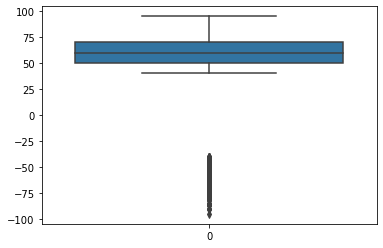

In [63]:
#Look into the Age feature - the potential impact of the outlier

sns.boxplot(data=df['Age'])

df[df['Age']<0]

In [64]:
# Ascertain the impact of the age to the Survival label

df[df['Age']>0].corr()['Age']

Survive                     0.255678
Age                         1.000000
Sodium                     -0.055107
Creatinine                  0.161922
Pletelets                  -0.050929
Creatinine phosphokinase   -0.095042
Blood Pressure              0.088240
Hemoglobin                 -0.071780
Height                     -0.002516
Weight                      0.169804
Smoke_No                   -0.025165
Smoke_Yes                   0.025165
Gender_Female              -0.064917
Gender_Male                 0.064917
Diabetes_Diabetes          -0.068542
Diabetes_Normal             0.108296
Diabetes_Pre-diabetes      -0.063147
Ejection Fraction_High     -0.085559
Ejection Fraction_Low      -0.018093
Ejection Fraction_Normal    0.035455
Name: Age, dtype: float64

###### Age has a highly correlated attribute to the survivorship. 

###### Hence it is important to access further on the other possible logical age related parameter - Ejection Fraction & Diabetesto access the possibility of incorrect indication of the negative sign on the respective age columns.

<AxesSubplot:xlabel='Ejection Fraction', ylabel='Age'>

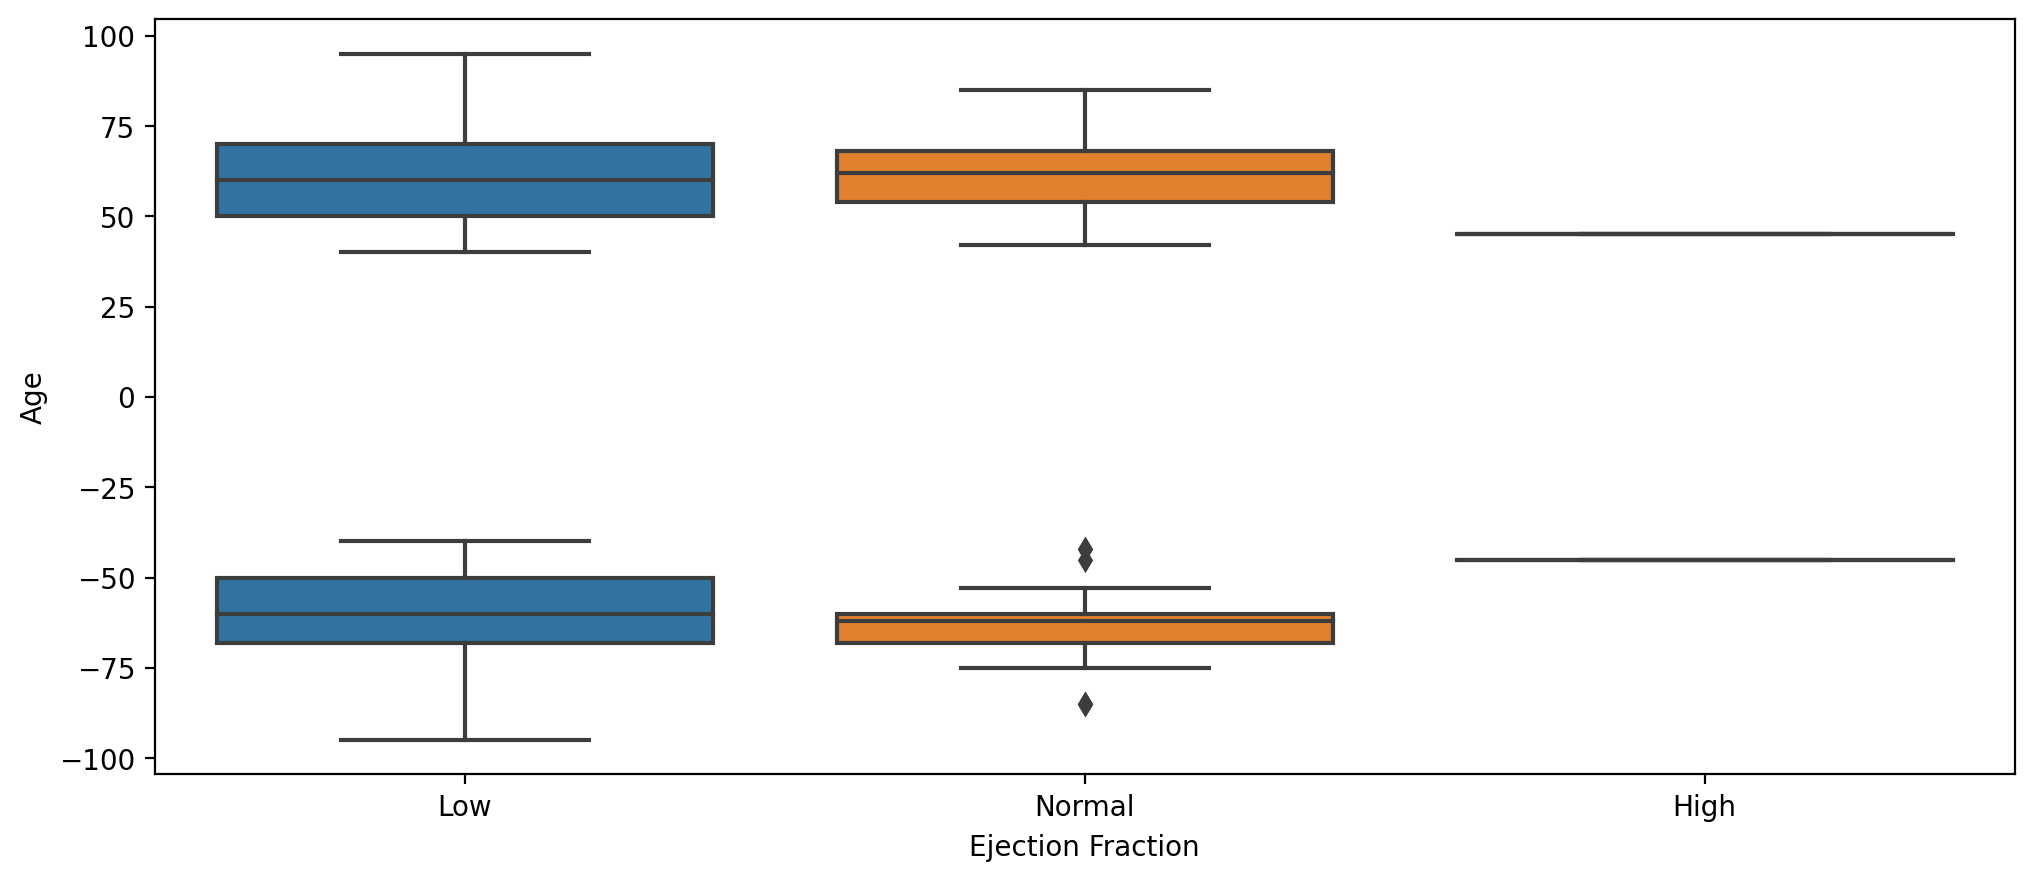

In [65]:
plt.figure(figsize=(12,5),dpi=200)
sns.boxplot(x='Ejection Fraction',y='Age',data=df[df['Age']>0])
sns.boxplot(x='Ejection Fraction',y='Age',data=df[df['Age']<0])

<AxesSubplot:xlabel='Diabetes', ylabel='Age'>

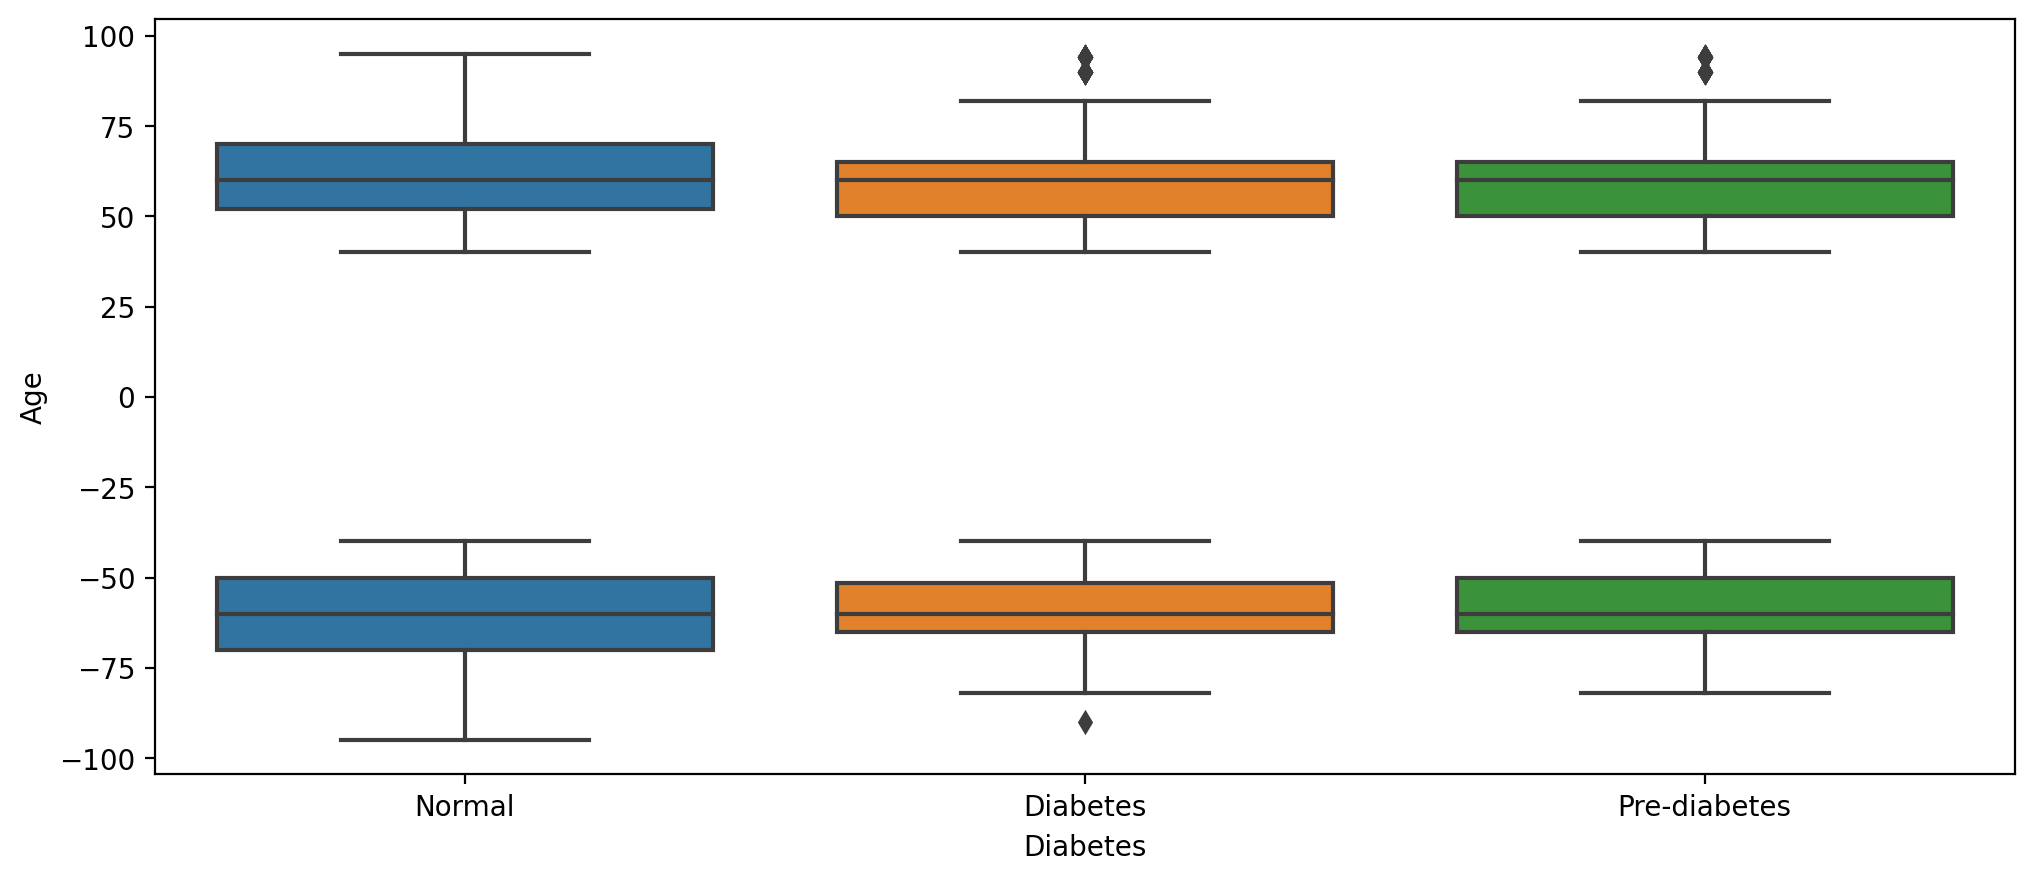

In [66]:
plt.figure(figsize=(12,5),dpi=200)
sns.boxplot(x='Diabetes',y='Age',data=df[df['Age']>0])
sns.boxplot(x='Diabetes' ,y='Age',data=df[df['Age']<0])



###### There is a high probability that it was entered wrongly with negative sign in front as the parameter look reasonable.

###### A quick eye scan on the reasonable age related measurement - Diabetes and Ejection Fraction demonstrate that the negative age fall into the similar quartile of those that are normal.

###### Hence, the conclusion is the transform all the negative figure in the age feature back into the positive.



In [67]:
# Translate all the negative age back the positive as per the conclusion above

df['Age']= abs(df['Age'])

##            Data Exploration

_____________________________________________

<AxesSubplot:>

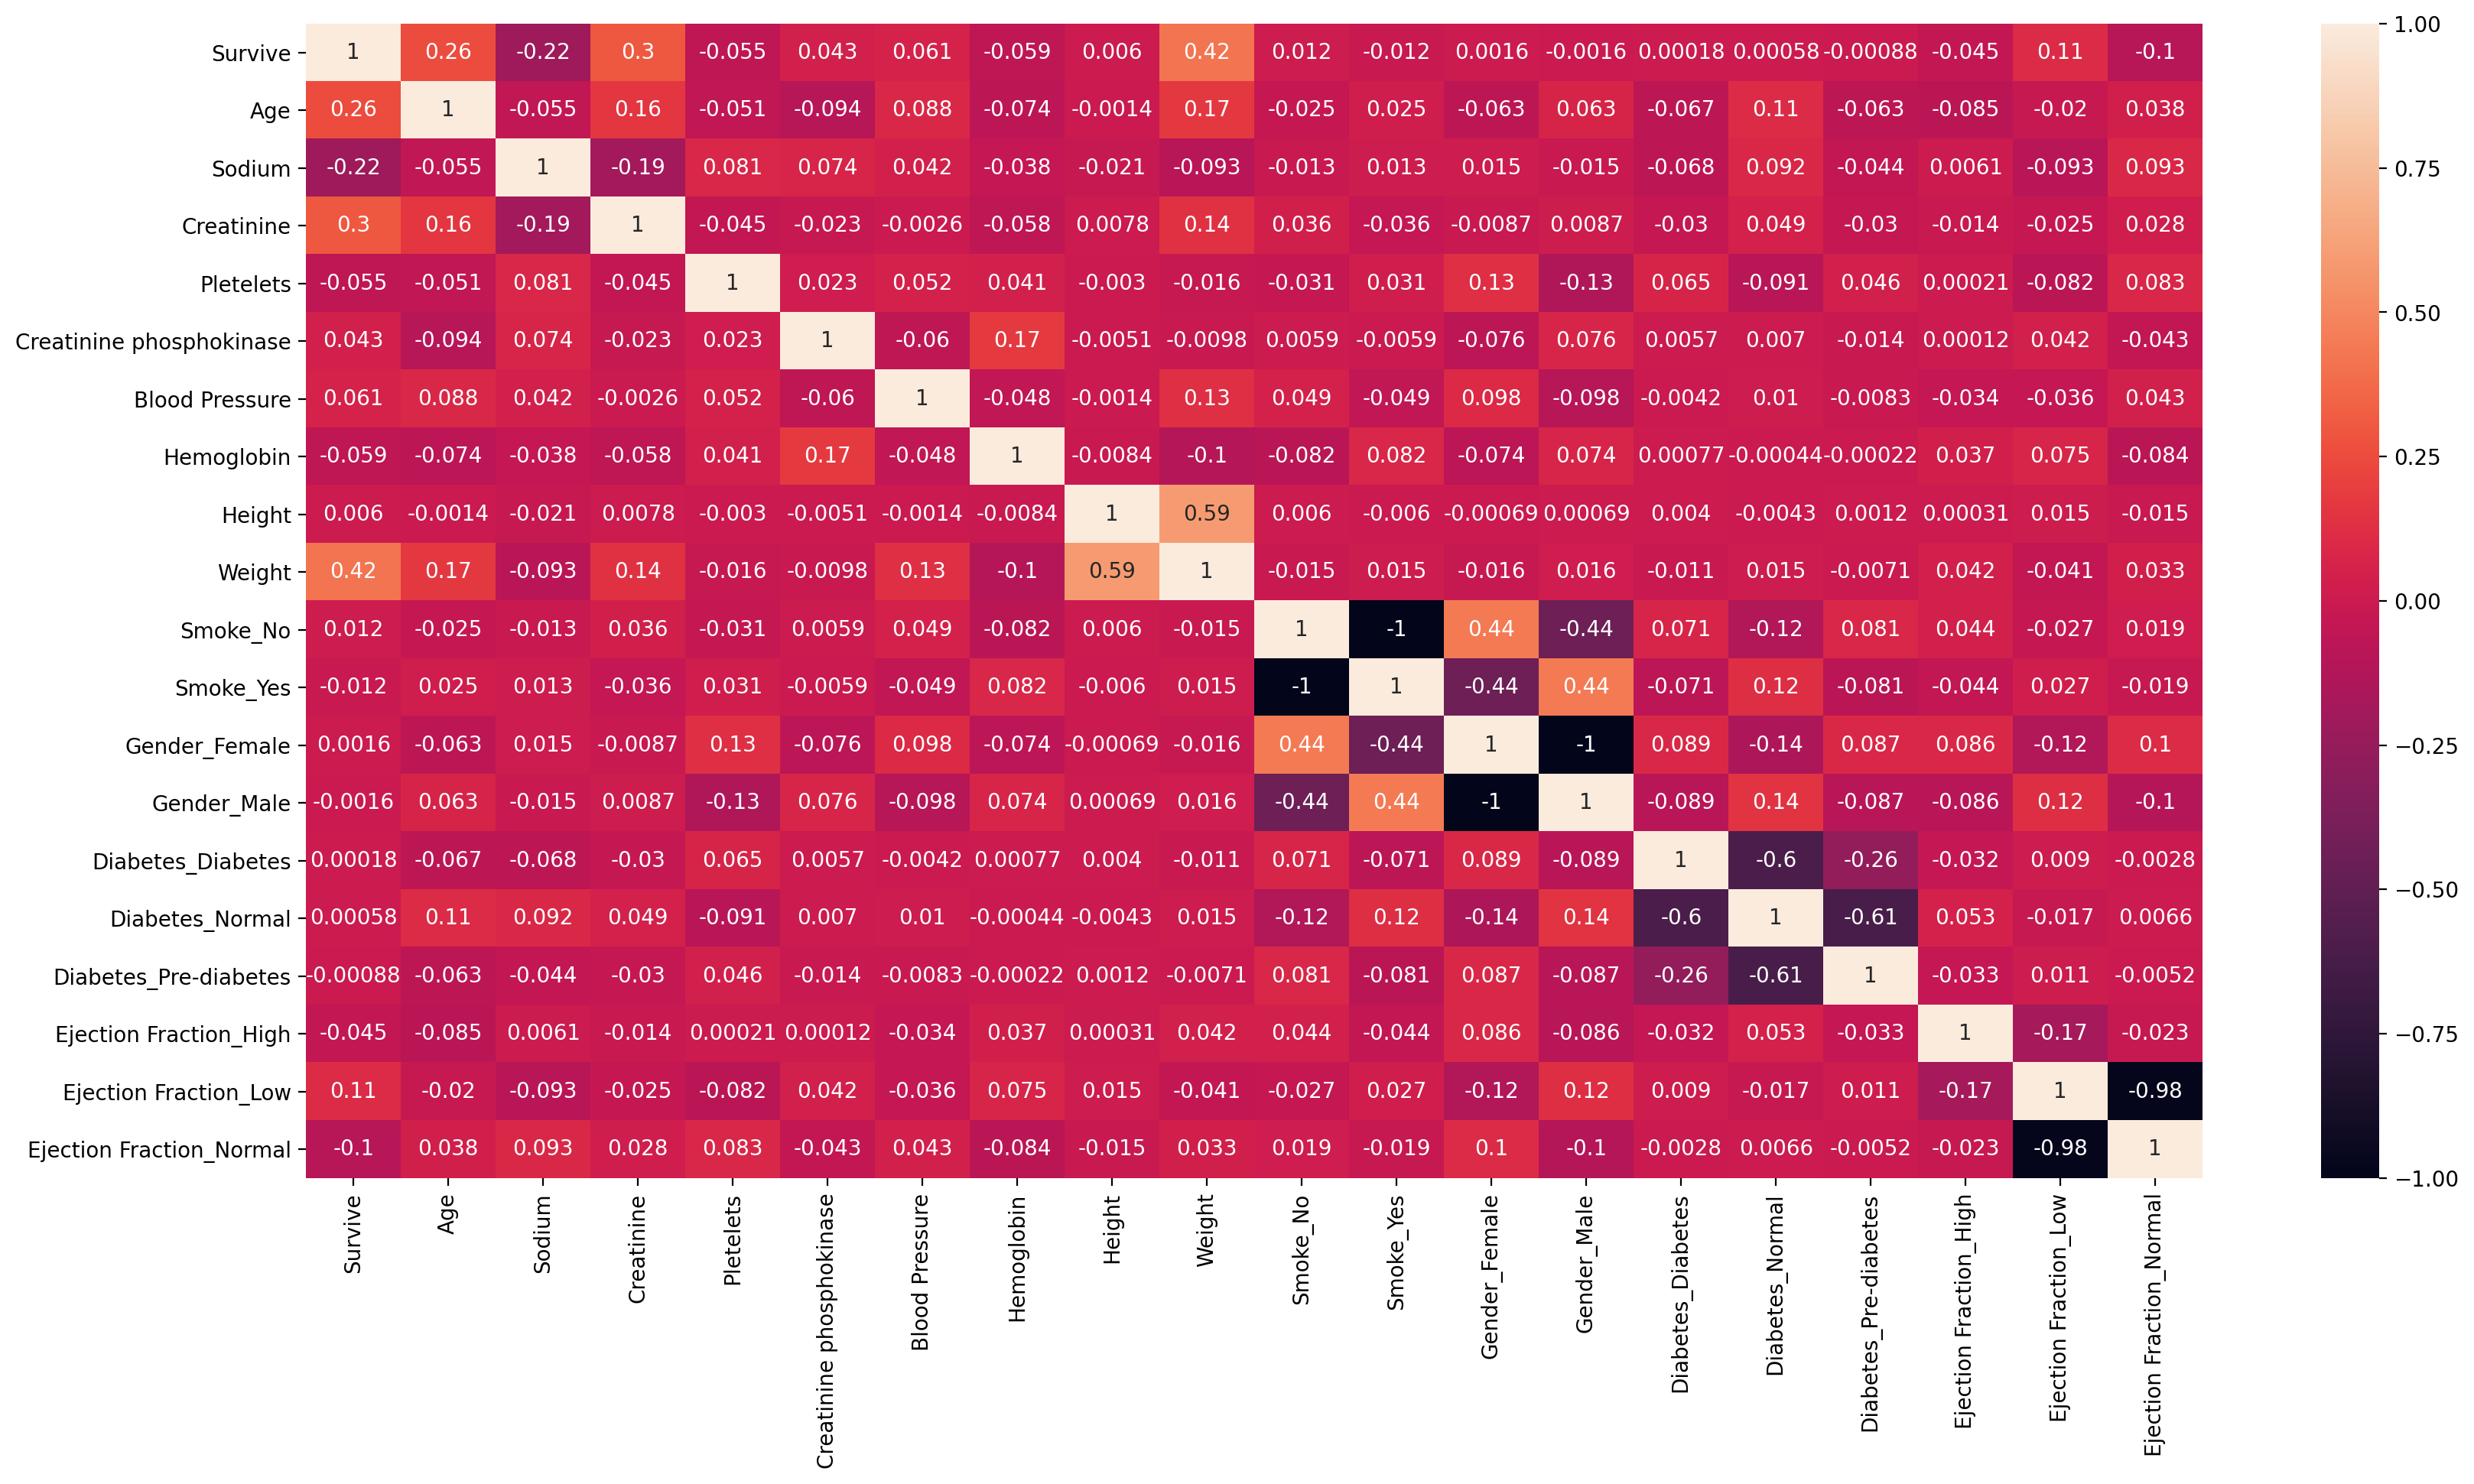

In [68]:
#Correlation Studies

plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(df.corr(),annot=True)

###### Aside from the Weight,Age and Creatinine discovered eariler on, a new features with positive correlation of 11 - Low Ejection Fraction was found where it has an impact on the survivorship

###### From the new discovery, Low Ejection Fraction was found to have positive correlation with the male gender.

0    9686
1    4815
Name: Survive, dtype: int64


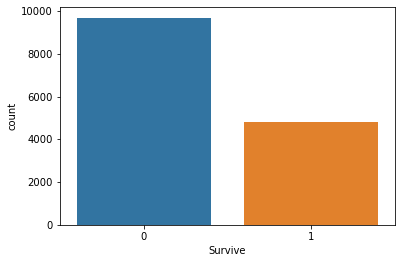

In [69]:
#Survival rate Visualisation

sns.countplot(data=df,x='Survive')
print(df['Survive'].value_counts())


###### There are more non-survivor in this dataset where it represented 66.8% of the clean up dataset.

<AxesSubplot:xlabel='Creatinine', ylabel='count'>

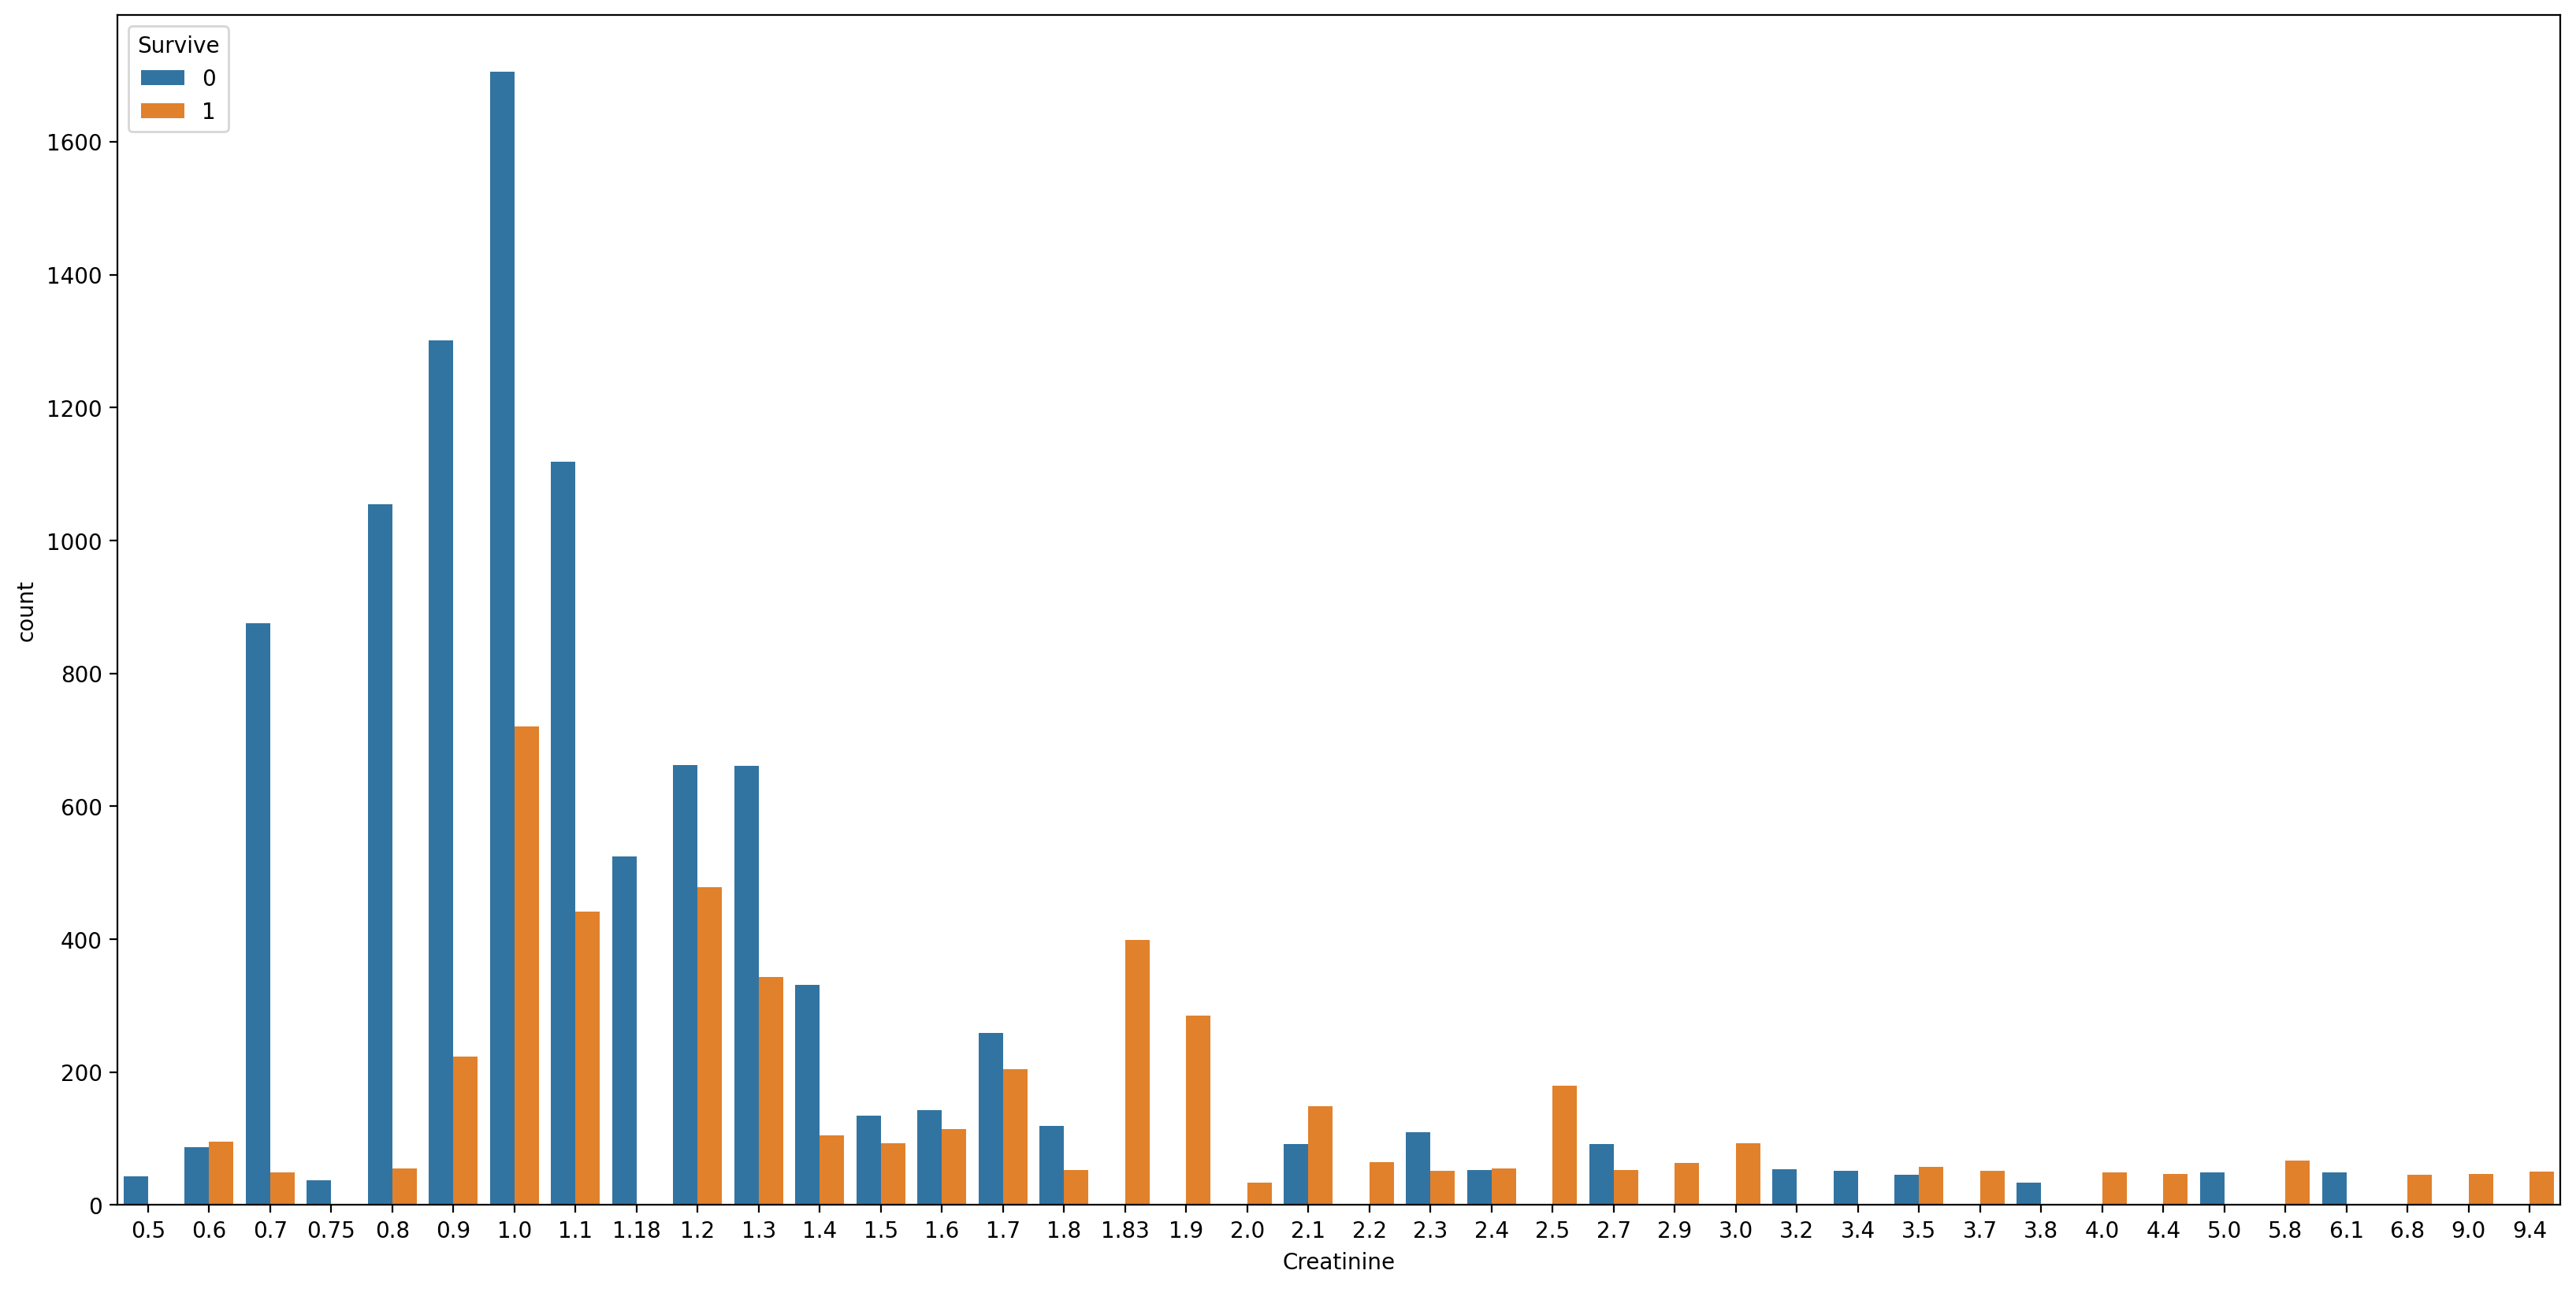

In [70]:
# Relation of Creatinine with Surivorship

plt.figure(figsize=(20,10),dpi=200)
sns.countplot(data=df,x='Creatinine',hue='Survive')

###### The survivor rate tend to increase on level of creatinine in the blood serum (mEq/L) beyond the 1.83 mark.
###### While the majority of the non survival has it be 1.2 mark

<Figure size 4000x2000 with 0 Axes>

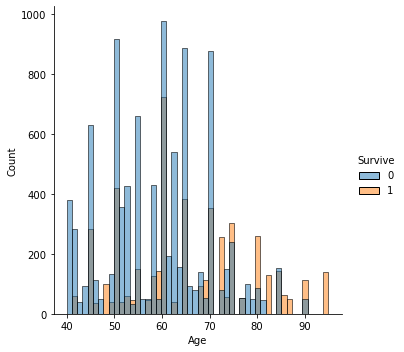

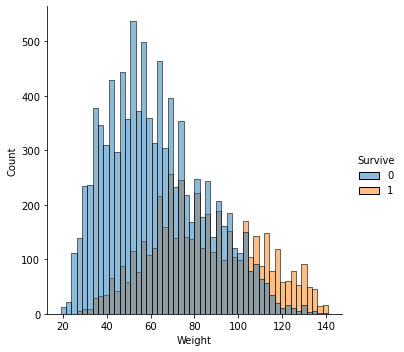

In [71]:
# Relation of Age,Weight with Surivorship


plt.figure(figsize=(20,10),dpi=200)
sns.displot(data=df,x='Age',hue='Survive',bins=50)
sns.displot(data=df,x='Weight',hue='Survive',bins=50)

###### An interesting observation was that the survivor rate seems to improve from the weight beyond 70

##### The plot has also clearly depicted the low probability of survival for any age below 59 

<AxesSubplot:xlabel='Age', ylabel='Weight'>

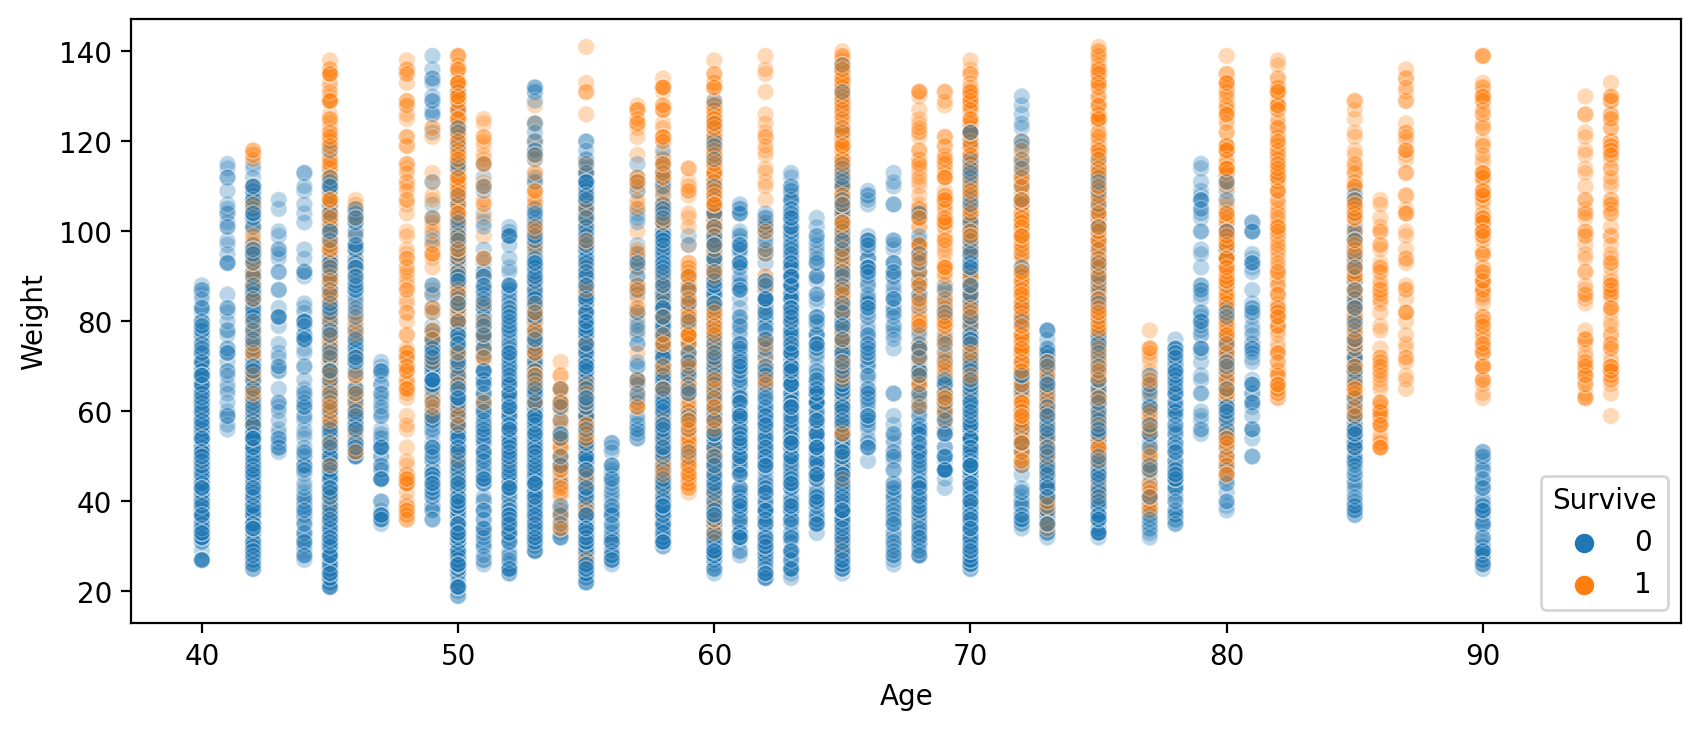

In [72]:
# Further Investigate the scatterplot relation of the Age and Weight 

plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='Age',y='Weight',hue='Survive',alpha=0.3)


In [73]:
def weightcat(Weight):
    if Weight < 50:
        return '< 50kg'
    elif Weight < 70:
        return '< 70kg'
    elif Weight < 100:
        return '< 100kg'
    else:
        return " over 100kg"

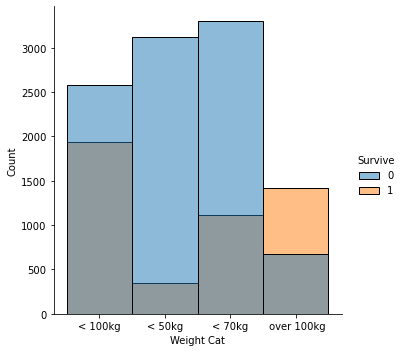

In [74]:
df['Weight Cat'] = df['Weight'].apply(weightcat)
sns.displot(data=df,x='Weight Cat',hue='Survive',bins=50)

###### A further investigate found that that chance of survival increase with more weight that he/she had, ideally above 70 kg 
###### The chance of suriving for any age below 45 is low and older you get, the likely you are going to survive.

<AxesSubplot:xlabel='Weight', ylabel='Creatinine'>

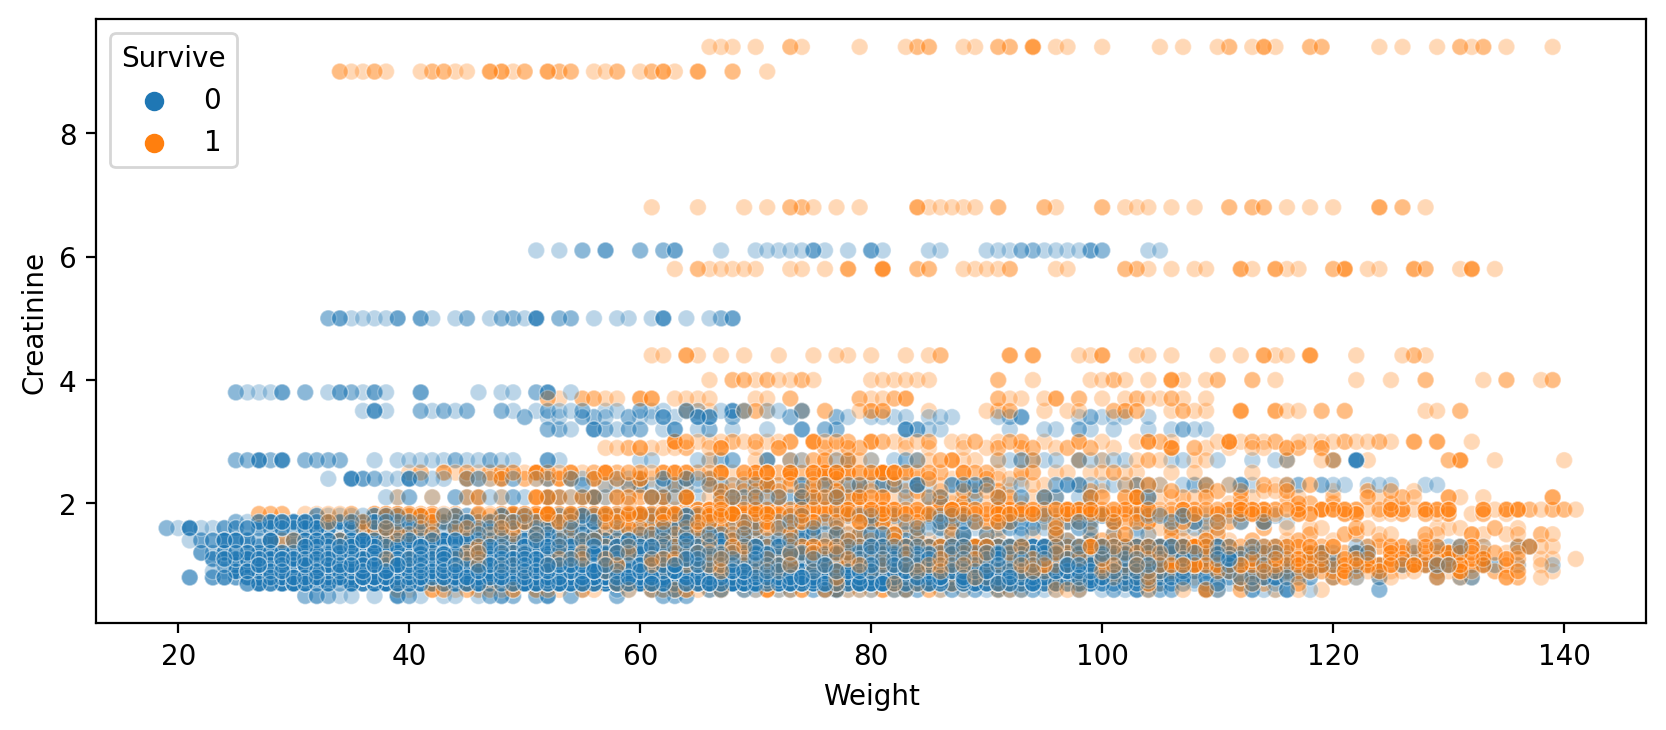

In [75]:
# Further Investigate the scatterplot relation of the Weight and Creatinine as there is high correlation of 0.13 between them in the eariler missing value investigation

plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='Weight',y='Creatinine',hue='Survive',alpha=0.3)


###### Any value of Creatininie below 2 will decrease the chances of survival unless he/she has the weight above 110 mark

_______________________

In [76]:
#Function for chart and count on the relationship between the feature object and Survival

def objectplotcount(object):
    sns.countplot(data=df,x=object,hue='Survive')
    print(df[object].value_counts())
    print('\n')
    unique = list(df[object].unique())
    count = len(list(df[object].unique()))
    
    print('Non-Survival Count')
    i=0
    
    for i in range(count):
        count = df[df[object]==unique[i]]['Survive'].value_counts()[0]
        print(unique[i],"-",count)
        

No     9778
Yes    4723
Name: Smoke, dtype: int64


Non-Survival Count
Yes - 3193
No - 6493


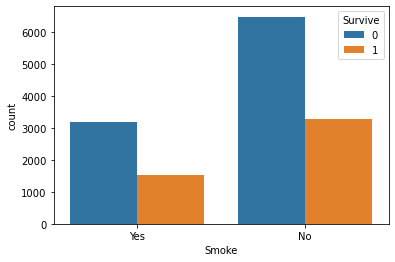

In [77]:
objectplotcount('Smoke')


Normal          8499
Pre-diabetes    3025
Diabetes        2977
Name: Diabetes, dtype: int64


Non-Survival Count
Normal - 5675
Pre-diabetes - 2023
Diabetes - 1988


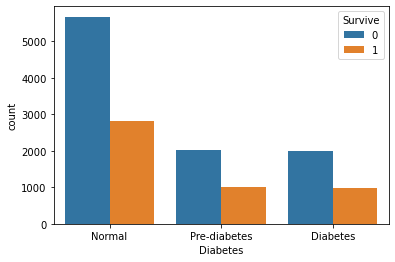

In [78]:
objectplotcount('Diabetes')


Male      9427
Female    5074
Name: Gender, dtype: int64


Non-Survival Count
Male - 6302
Female - 3384


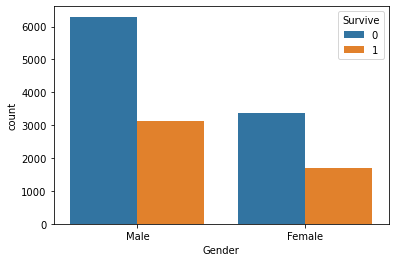

In [79]:
objectplotcount('Gender')

Low       12781
Normal     1662
High         58
Name: Ejection Fraction, dtype: int64


Non-Survival Count
Low - 8297
Normal - 1331
High - 58


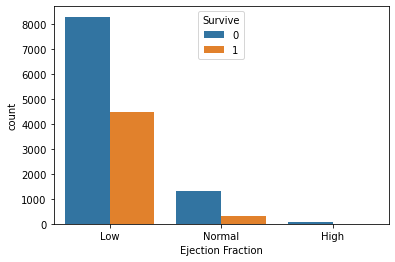

In [80]:
objectplotcount('Ejection Fraction')

In [81]:
df[df['Ejection Fraction'] == 'High']['Survive'].value_counts()

0    58
Name: Survive, dtype: int64

###### Non-Survival rate found in the attributes of the Smoke,Gender,Diabeties and Low Ejection Fraction were similar to the eariler Survival rate visualisation in both visual sighting and percentage attribute around the 66-67% mark

###### A higher non-survival rate were found among normal Ejection Fraction of 80% and 100% positive corrrelation in the high Ejection Fraction

_____________________________________

In [82]:
#One-hot encode the colour

color=df[['Favorite color']]
color = pd.get_dummies(color)
color

,Favorite color_black,Favorite color_blue,Favorite color_green,Favorite color_red,Favorite color_white,Favorite color_yellow
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,1,0,0,0,0
...,...,...,...,...,...,...
14995,0,1,0,0,0,0
14996,0,0,1,0,0,0
14997,0,1,0,0,0,0
14998,0,0,0,1,0,0


In [83]:
# Join the encoding data to the main dataframe
c_df = df.join(color)

<AxesSubplot:>

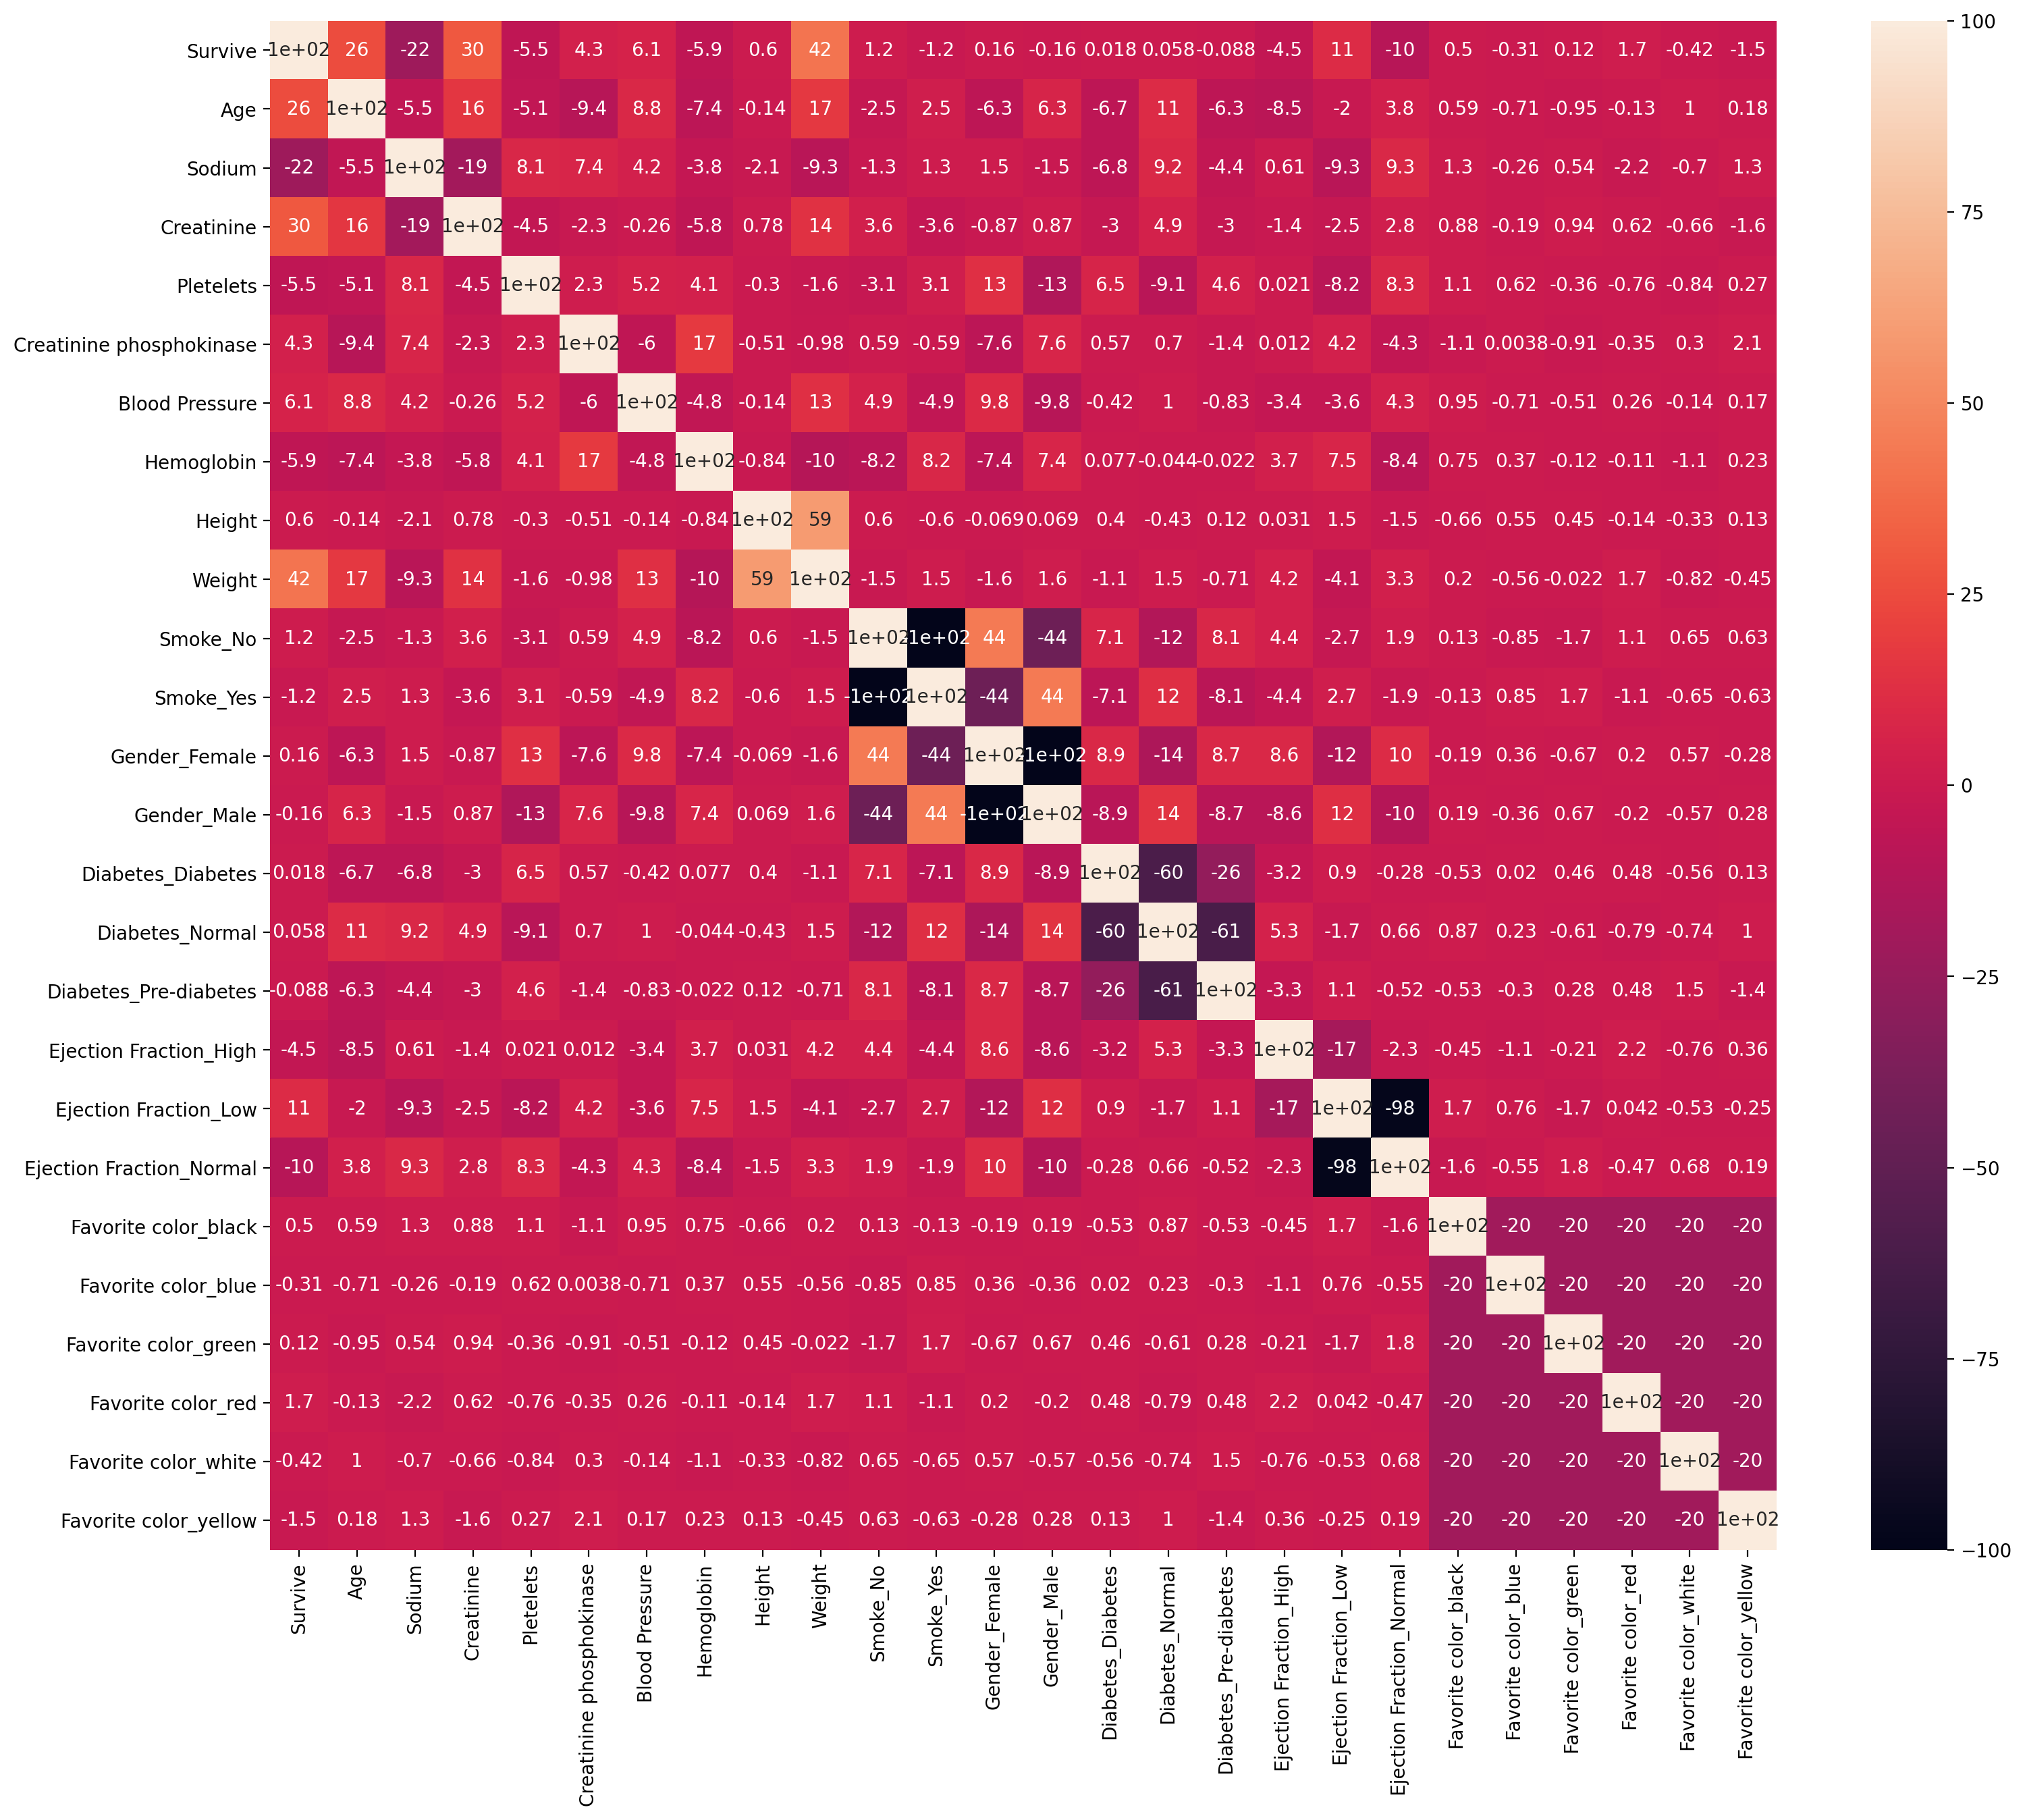

In [84]:
#Check the impact of favourite color on the survivorship


plt.figure(figsize=(18,15),dpi=200)
sns.heatmap(c_df.corr()*100,annot=True)

###### As expected, the favourite color has no decent correlation with the survivership and other parameters

________

## EDA Conclusion

___________

###### The current data exploration has found that 4 attributes with that reflect a decent degree of positive correlation with the survivorship namely 
###### 1) Weight (heavier) 2) Age (Older) 3) Creatinine (level above 2) 4) Ejection Fraction (Low)

###### The other considerations is gender where the male gender had a positive correlation to one of the abovementioned attributes - Ejection Fraction (Low)